In [1]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.callbacks import TensorBoard
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import History
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

E:\Users\Arnab\Anaconda3\Lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
i = 112

In [3]:
model = Sequential()

In [4]:
NAME = "BanglaLekha_DCNN84_lr0.0005-{}".format(int(time.time()))
print(NAME)
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME), histogram_freq=0, write_images=True, write_graph=True, update_freq='epoch')



BanglaLekha_DCNN84_lr0.0005-1555570273


In [5]:
train_data = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
test_data = ImageDataGenerator(rescale=1./255)

training = train_data.flow_from_directory('Images',target_size=(i,i), batch_size=64,class_mode='categorical', subset='training')
test = train_data.flow_from_directory('Images',target_size=(i,i), batch_size=64,class_mode='categorical', subset='validation')

Found 132914 images belonging to 84 classes.
Found 33191 images belonging to 84 classes.


In [6]:
model.add(Conv2D(32,(3,3),input_shape=(i,i,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(512,activation="relu"))

model.add(Dense(units=84,activation="softmax"))
opt= Adam(lr=.0005)
model.compile(optimizer=opt, loss = "categorical_crossentropy", metrics= ["accuracy"])

history = History()
model.fit_generator(training, epochs=100, validation_data=test, callbacks=[tensorboard,history])


Epoch 1/100
2077/2077 [==============================] - 1754s 845ms/step - loss: 1.3822 - acc: 0.6213 - val_loss: 1.1222 - val_acc: 0.9124
Epoch 2/100
2077/2077 [==============================] - 209s 101ms/step - loss: 0.6215 - acc: 0.8195 - val_loss: 0.9251 - val_acc: 0.9293
Epoch 3/100
2077/2077 [==============================] - 203s 98ms/step - loss: 0.5159 - acc: 0.8513 - val_loss: 0.6376 - val_acc: 0.9401
Epoch 4/100
2077/2077 [==============================] - 206s 99ms/step - loss: 0.4594 - acc: 0.8658 - val_loss: 0.5334 - val_acc: 0.9457
Epoch 5/100
2077/2077 [==============================] - 201s 97ms/step - loss: 0.4211 - acc: 0.8773 - val_loss: 0.4095 - val_acc: 0.9538
Epoch 6/100
2077/2077 [==============================] - 210s 101ms/step - loss: 0.3934 - acc: 0.8850 - val_loss: 0.3639 - val_acc: 0.9491
Epoch 7/100
2077/2077 [==============================] - 206s 99ms/step - loss: 0.3701 - acc: 0.8910 - val_loss: 0.3921 - val_acc: 0.9526
Epoch 8/100
2077/2077 [=======

Epoch 60/100
2077/2077 [==============================] - 209s 101ms/step - loss: 0.1916 - acc: 0.9396 - val_loss: 0.1885 - val_acc: 0.9583
Epoch 61/100
2077/2077 [==============================] - 212s 102ms/step - loss: 0.1926 - acc: 0.9394 - val_loss: 0.1798 - val_acc: 0.9599
Epoch 62/100
2077/2077 [==============================] - 211s 101ms/step - loss: 0.1904 - acc: 0.9405 - val_loss: 0.1915 - val_acc: 0.9569
Epoch 63/100
2077/2077 [==============================] - 213s 102ms/step - loss: 0.1917 - acc: 0.9401 - val_loss: 0.1928 - val_acc: 0.9569
Epoch 64/100
2077/2077 [==============================] - 207s 100ms/step - loss: 0.1917 - acc: 0.9405 - val_loss: 0.1920 - val_acc: 0.9570
Epoch 65/100
2077/2077 [==============================] - 212s 102ms/step - loss: 0.1918 - acc: 0.9403 - val_loss: 0.2064 - val_acc: 0.9554
Epoch 66/100
2077/2077 [==============================] - 204s 98ms/step - loss: 0.1938 - acc: 0.9396 - val_loss: 0.1781 - val_acc: 0.9600
Epoch 67/100
2077/207

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


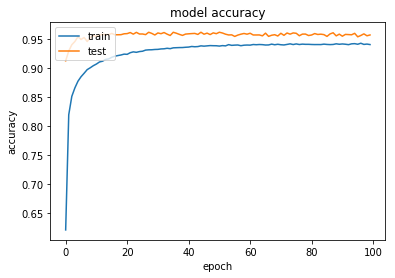

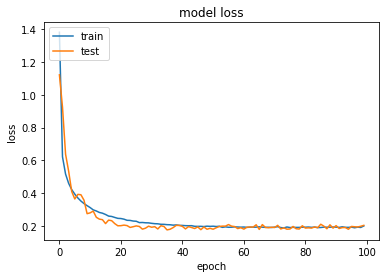

Found 166105 images belonging to 84 classes.
[ 0  0  0 ... 83 83 83]
Confusion Matrix
[[1959    0    0 ...    0    0    1]
 [   0 1892    5 ...    0    0    0]
 [   0    3 1928 ...    0    0   17]
 ...
 [   1    0    0 ... 1859    0    0]
 [   0    0    0 ...    0 1931    0]
 [   2    0    6 ...    0    0 1959]]
[[1959    0    0 ...    0    0    1]
 [   0 1892    5 ...    0    0    0]
 [   0    3 1928 ...    0    0   17]
 ...
 [   1    0    0 ... 1859    0    0]
 [   0    0    0 ...    0 1931    0]
 [   2    0    6 ...    0    0 1959]]
Classification Report
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1975
          1       0.96      0.96      0.96      1981
          2       0.99      0.97      0.98      1982
          3       0.98      0.99      0.98      1984
          4       0.97      0.91      0.94      1969
          5       0.99      0.96      0.98      1983
          6       0.89      0.96      0.93      1975
          7

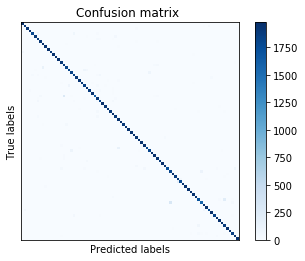

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0         
__________

In [7]:
plot_model(model, to_file='model.png')

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

start = time.time()
testp = test_data.flow_from_directory('Images',target_size=(i,i), batch_size=64,class_mode='categorical',shuffle=False)        
start1 = time.time()
t_pred = model.predict_generator(testp)
end = time.time()
pred = np.argmax(t_pred, axis=1)
print(pred)
print('Confusion Matrix')
conf = confusion_matrix(testp.classes, pred)
print(conf)
print(str(conf))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']
for k in range(10,84):
    k1=k
    target_names.append(str(k1))
f1 = classification_report(testp.classes, pred, target_names=target_names)
print(f1)

print("\nDirectory and predict: ",end-start)
print("Predict: ",end-start1)
model.save('all.h5')

plt.imshow(conf, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()
print(model.summary())   


In [8]:
import csv
f = open("BanglaLekha.csv",'w',newline ='')
a = []
for i in range (0,84):
   print("\n")
   for j in range(0,84):
       a.append(conf[i][j])
       print(conf[i][j], end=' ')
       csv.writer(f).writerow(a)
       a = []
f.close()



1959 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 6 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 

0 1892 5 0 0 0 0 6 0 0 1 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 0 0 0 0 1 2 0 1 0 1 0 0 0 6 2 1 0 0 1 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 12 0 35 0 0 0 0 1 0 0 0 0 0 0 

0 3 1928 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 3 0 0 0 0 0 0 0 17 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 17 

0 0 0 1963 0 0 1 0 2 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 1784 0 56 0 0 0 0 0 0 0 0 0 0 0 0 0 73 0 0 4 0 0 0 1 0 23 5 0 0 0 1 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 7 1 0 0 0 0 0 3 0 0 

0 0 0 0 1 1906 2 0 0 0 1 0 0 0 0 1 0 0 4 0 0 0 0 0 1 12 0 0 0 1 0 1 1 0 1 0 47 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0

0 7 0 0 0 0 1 5 2 0 1 0 0 1 2 0 1 6 0 93 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 10 4 1 0 1812 0 2 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 4 0 0 0 0 0 0 14 0 0 0 0 0 1 

0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 5 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 1961 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 20 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1953 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 1 8 0 0 0 0 0 0 0 0 19 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 1 0 6 1934 0 1 1 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 

0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 2 0 33 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1906 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 

0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1970 0 0 0 0 0 0 0 0 